In [1]:
import pandas as pd
import numpy as np

df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header = None)

df_wine.columns = ["Class label", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", 
                   "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", 
                   "OD280/OD315 of diluted wines", "Proline"]

print("Class labels", np.unique(df_wine["Class label"]))

df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
#主成分分析(PCA)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 0)
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [3]:
cov_mat = np.cov(X_train_std.T) #共分散行列 ＊np.covはデフォルトで不偏標本分散を返す
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) #固有値と固有ベクトルを計算
print("Eigenvalues \n", eigen_vals)

Eigenvalues 
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


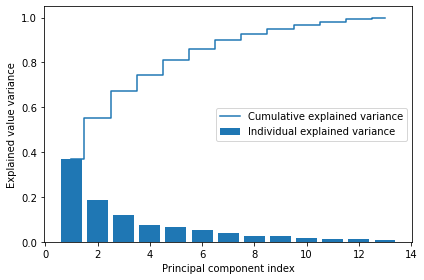

In [4]:
#分散説明率（全体の分散に対する主成分の分散の割合）を可視化
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, align = "center", label = "Individual explained variance")
plt.step(range(1, 14), cum_var_exp, where = "mid", label = "Cumulative explained variance")
plt.ylabel("Explained value variance")
plt.xlabel("Principal component index")
plt.legend(loc = "best")
plt.tight_layout()
plt.show()

In [5]:
#射影行列を生成
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key = lambda k: k[0], reverse = True) #固有値の降順にソート

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis])) #上位２つの固有ベクトルを取り出す

print("Matrix W:\n", w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [6]:
X_train_pca = X_train_std.dot(w)

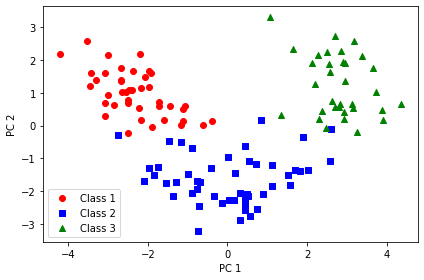

In [7]:
#主成分変換されたデータセット
colors = ["r", "b", "g"]
markers = ["o", "s", "^"]

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], X_train_pca[y_train == l, 1], c = c, label = f"Class {l}", marker = m)

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc = "lower left")
plt.tight_layout()
plt.show()

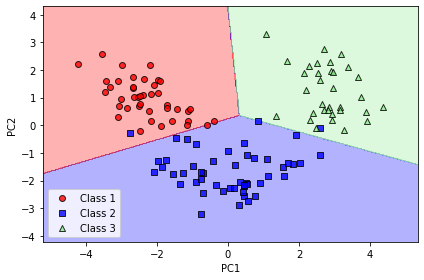

In [34]:
#scikit-learnによる実装
import PDR
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
lr = LogisticRegression(multi_class = "ovr", random_state = 1, solver = "lbfgs")
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)

PDR.plot_decision_regions(X_train_pca, y_train, classifier = lr)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc = "lower left")
plt.tight_layout()
plt.show()

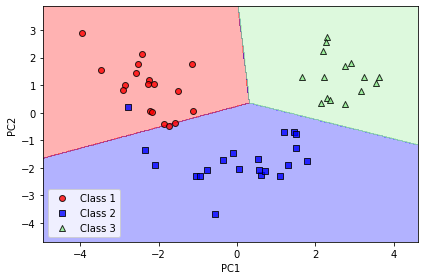

In [35]:
PDR.plot_decision_regions(X_test_pca, y_test, classifier = lr)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc = "lower left")
plt.tight_layout()
plt.show()

In [10]:
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_ #分散説明率

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

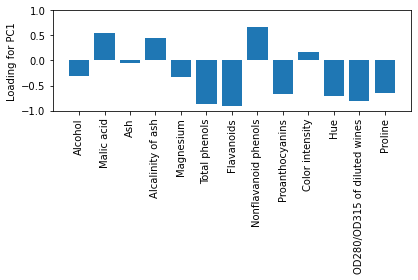

In [12]:
#主成分と特徴量の相関
loading = eigen_vecs * np.sqrt(eigen_vals)

fig, ax = plt.subplots()
ax.bar(range(13), loading[:, 0], align = "center")
ax.set_ylabel("Loading for PC1")
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation = 90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

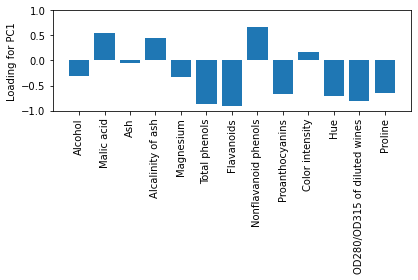

In [15]:
#sklearn組み込み関数で相関を調べる
sklearn_loading = pca.components_.T * np.sqrt(pca.explained_variance_)
fig, ax = plt.subplots()
ax.bar(range(13), sklearn_loading[:, 0], align = "center")
ax.set_ylabel("Loading for PC1")
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation = 90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

In [16]:
#LDA
np.set_printoptions(precision = 4)
mean_vecs = [] #各クラスの集合ごとに特徴量の平均ベクトルを生成
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis = 0))
    print(f"MV {label}: {mean_vecs[label -1]}\n")

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [23]:
#クラス内変動行列の計算
d = 13
S_W = np.zeros((d,d))
for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d,1), mv.reshape(d,1)
        class_scatter += (row-mv).dot((row-mv).T)
    S_W += class_scatter

print("Within-class scatter matrix: ", f"{S_W.shape[0]}x{S_W.shape[1]}")

Within-class scatter matrix:  13x13


In [22]:
print("Class label distribution:", np.bincount(y_train)[1:])

Class label distribution: [41 50 33]


各クラスのデータ点数が異なるため、スケーリングの必要性

In [24]:
#クラス内変動行列をスケーリングしたものは共分散と同じ
d = 13
S_W = np.zeros((d,d))
for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter

print("Within-class scatter matrix: ", f"{S_W.shape[0]}x{S_W.shape[1]}")

Within-class scatter matrix:  13x13


In [27]:
#クラス間変動行列の計算
mean_overall = np.mean(X_train_std, axis = 0) #総平均ベクトル
mean_overall = mean_overall.reshape(d, 1)

S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1].shape[0]
    mean_vec = mean_vec.reshape(d, 1)
    S_B += n * (mean_vec -mean_overall).dot((mean_vec -mean_overall).T)
print("Between-class scatter matrix: ", f"{S_B.shape[0]}x{S_B.shape[1]}")

Between-class scatter matrix:  13x13


In [28]:
#S_W^-1・１S_Bの固有値を求める
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key = lambda k: k[0], reverse = True) #固有値の降順にソート
print("Eigenvalues in descending order:\n")
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

349.6178089059939
172.761522189794
5.4135043177671557e-14
2.9382209309371415e-14
2.9382209309371415e-14
2.407126389906803e-14
2.407126389906803e-14
1.4527708338211376e-14
8.840478933910846e-15
8.840478933910846e-15
7.247315086280655e-15
7.247315086280655e-15
9.373146983106076e-16


S_Bは階数１以下のc（クラスの個数）個の行列を合計したものであるため、固有値が非０のものは最大でもc-1個

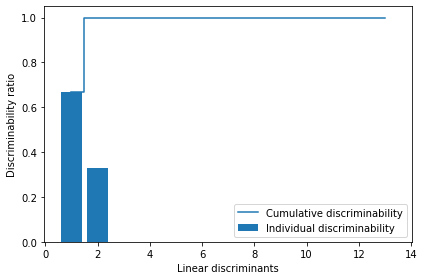

In [29]:
#判別性を可視化
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse = True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, align = "center", label = "Individual discriminability")
plt.step(range(1, 14), cum_discr, where = "mid", label = "Cumulative discriminability")
plt.ylabel("Discriminability ratio")
plt.xlabel("Linear discriminants")
plt.legend(loc = "best")
plt.tight_layout()
plt.show()

In [30]:
#固有ベクトル行列
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))

print("Matrix W:\n", w)

Matrix W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


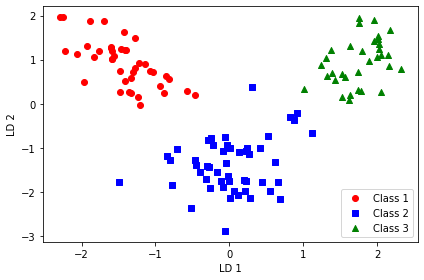

In [33]:
X_train_lda = X_train_std.dot(w)

colors = ["r", "b", "g"]
markers = ["o", "s", "^"]

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0], X_train_lda[y_train == l, 1] * (-1), c = c, label = f"Class {l}", marker = m)

plt.xlabel("LD 1")
plt.ylabel("LD 2")
plt.legend(loc = "lower right")
plt.tight_layout()
plt.show()

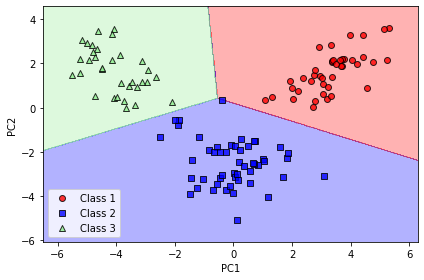

In [36]:
#scikit-learnによる実装
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)
lr = LogisticRegression(multi_class = "ovr", random_state = 1, solver = "lbfgs")
lr.fit(X_train_lda, y_train)

PDR.plot_decision_regions(X_train_lda, y_train, classifier = lr)
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend(loc = "lower left")
plt.tight_layout()
plt.show()

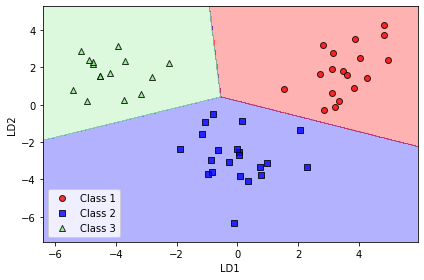

In [37]:
PDR.plot_decision_regions(X_test_lda, y_test, classifier = lr)
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend(loc = "lower left")
plt.tight_layout()
plt.show()

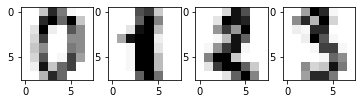

In [40]:
#t-SNE
from sklearn.datasets import load_digits
digits = load_digits()

fig, ax = plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(digits.images[i], cmap = "Greys")
plt.show()

In [41]:
digits.data.shape

(1797, 64)

In [42]:
y_digits = digits.target
X_digits = digits.data

In [43]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, init = "pca", random_state = 123)
X_digits_tsne = tsne.fit_transform(X_digits)

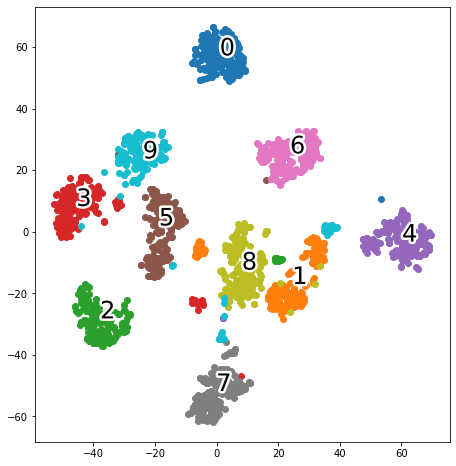

In [46]:
import matplotlib.patheffects as PathEffects
def plot_projection(x, colors):
    f = plt.figure(figsize = (8, 8))
    ax = plt.subplot(aspect = "equal")
    for i in range(10):
        plt.scatter(x[colors == i, 0], x[colors == i, 1])
    for i in range(10):
        xtext, ytext = np.median(x[colors == i, :], axis = 0)
        txt = ax.text(xtext, ytext, str(i), fontsize = 24)
        txt.set_path_effects([PathEffects.Stroke(linewidth = 5, foreground = "w"), 
                              PathEffects.Normal()])
        
plot_projection(X_digits_tsne, y_digits)
plt.show()